### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn")

### Extract and read data

In [2]:
housing = pd.read_csv("testing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Get Information About The Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Find The Percentage Of missing Values
From the data info above, we can see that not all rows in total_bedrooms column is filled

In [4]:
percent_missing = housing.isnull().sum() * 100 / len(housing)
percent_missing

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

### Filling The Missing Values In total_bedrooms column

In [5]:
housing["total_bedrooms"].fillna(0, inplace=True)

# check for missing values
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Check DataFrame For Duplicates

In [6]:
housing.duplicated().sum()

0

## Bar Chart

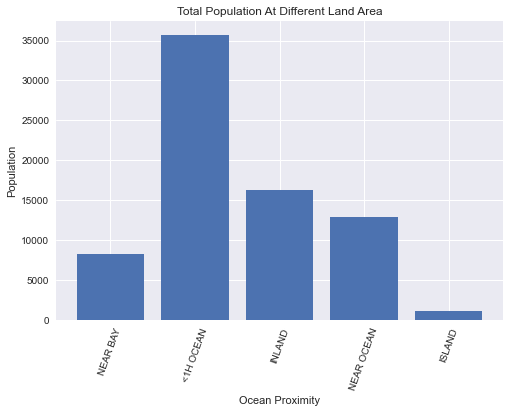

In [7]:
plt.title("Total Population At Different Land Area")

x = housing.ocean_proximity
y = housing.population

plt.xticks(rotation=70)  # rotate chart label on x-axis
plt.xlabel("Ocean Proximity")
plt.ylabel("Population")

# plt.figure(figsize = (6, 4))

bar = plt.bar(x, y)
plt.show()

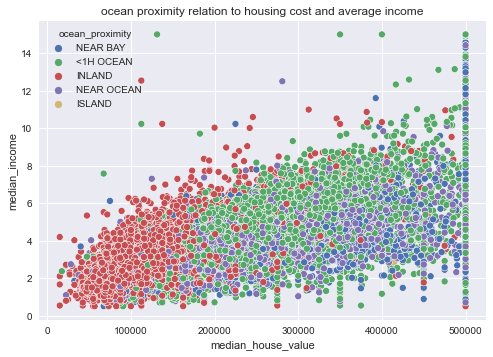

In [8]:
# ocean proximity relation to housing cost
plt.title("ocean proximity relation to housing cost and average income")

sns.scatterplot(data=housing, x='median_house_value', y='median_income', hue='ocean_proximity')

plt.show()

## Descriptive Statistics
This summaries each column in a dataset

In [9]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,532.476211,422.678333,0.0000,292.0000,431.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [10]:
# This table shows: 
# most expensive houseing block
# sorts houses by house value in descending order, which in turn shows the locations with the more expensive houses
# and from table you can tell that the average income of each household is mostly relative to the cost of housing

sort_by_median_house_value = housing.sort_values(by=["median_house_value"], ascending=False)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Which  is the Most Available House Type
- checking the houses with the highest number of bedrooms

In [11]:
# sort the dataframe by the number of bedrooms in a house
sort_by_bedrooms = housing.sort_values(by=["total_bedrooms"])
sort_by_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5059,-118.35,34.01,35.0,3776.0,0.0,1583.0,749.0,3.5486,332100.0,<1H OCEAN
17928,-121.97,37.34,33.0,3162.0,0.0,1553.0,686.0,3.6682,266100.0,<1H OCEAN
19391,-120.85,37.78,25.0,421.0,0.0,303.0,106.0,2.2679,71300.0,INLAND
6421,-117.99,34.14,30.0,2346.0,0.0,1988.0,474.0,2.5625,153000.0,INLAND
18466,-121.75,37.11,18.0,3167.0,0.0,1414.0,482.0,6.8773,467700.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


### PieChart

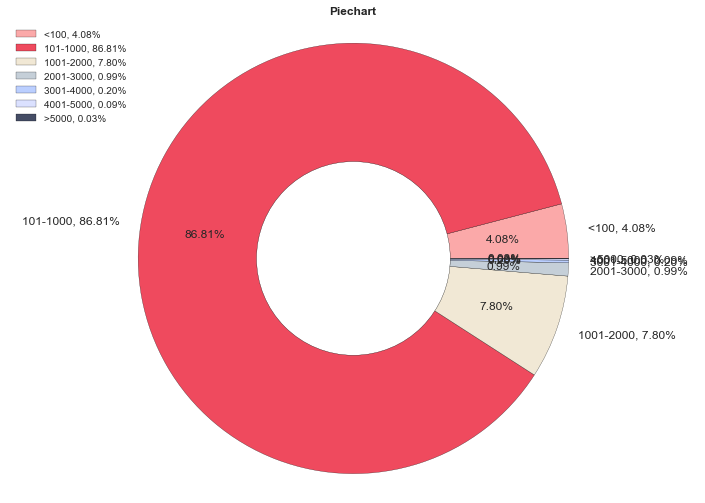

In [12]:
# group total_bedrooms rows in ranges

largest = housing.loc[(housing["total_bedrooms"] > 5000) & (housing["total_bedrooms"] <= housing["total_bedrooms"].max())].count()[0]
semi_large = housing.loc[(housing["total_bedrooms"] > 4000) & (housing["total_bedrooms"] <= 5000)].count()[0]
lower_semi_large = housing.loc[(housing["total_bedrooms"] > 3000) & (housing["total_bedrooms"] < 4000)].count()[0]
mid = housing.loc[(housing["total_bedrooms"] > 2000) & (housing["total_bedrooms"] <= 3000)].count()[0]
semi_mid = housing.loc[(housing["total_bedrooms"] > 1000) & (housing["total_bedrooms"] <= 2000)].count()[0]
lower_semi_mid = housing.loc[(housing["total_bedrooms"] > 100) & (housing["total_bedrooms"] <= 1000)].count()[0]
smallest = housing.loc[(housing["total_bedrooms"] >= 0) & (housing["total_bedrooms"] <= 100)].count()[0]

bedrooms = [smallest, lower_semi_mid, semi_mid, mid, lower_semi_large, semi_large, largest]
total = 0
for ele in range(0, len(bedrooms)):
    total = total + bedrooms[ele] 

labels = ["<100", "101-1000", "1001-2000", "2001-3000", "3001-4000", "4001-5000", ">5000"]
colors = ["#FA9494", "#EB1D36", "#EEE3CB", "#B7C4CF", "#AAC4FF", "#D2DAFF", "#16213E"]

# plot donut piechart

## plot title
plt.title("Piechart", fontweight = "bold", fontfamily = "sans-serif")
plt.subplots_adjust(0.8,0.8,2,2)

## labels
label = [f"{l}, {(s / total) * 100:0.2f}%" for l, s in zip(labels, bedrooms)]

plt.pie(bedrooms, labels = label, colors = colors, autopct = '%.2f%%', pctdistance = 0.7, wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {"fontsize": 12})
center_circle = plt.Circle((0, 0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(center_circle)
plt.axis("equal")
plt.legend(label, loc = "upper left")

plt.show()

### BarChart

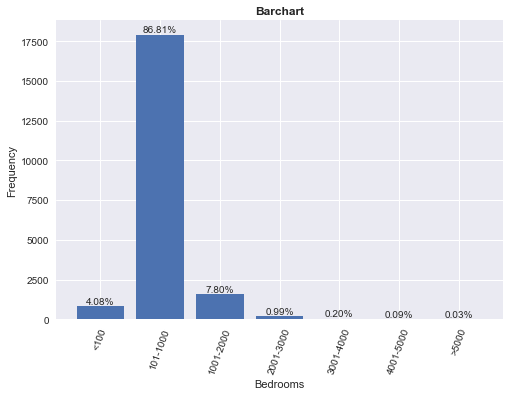

In [13]:
# Plot Barchart
plt.title("Barchart", fontweight = "bold", fontfamily = "sans-serif")


plt.xticks(rotation = 70)
bar = plt.bar(labels, bedrooms)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")

# add label to each bar

label = [f"{(s / total) * 100:0.2f}%" for l, s in zip(labels, bedrooms)]
rects = bar.patches
for rect, l in zip(rects, label):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2, height + 5, l, ha = "center", va = "bottom"
    )

plt.show()

## Visualizing The Location Of The Houses Base On Latitude And Longitude

<Figure size 720x720 with 0 Axes>

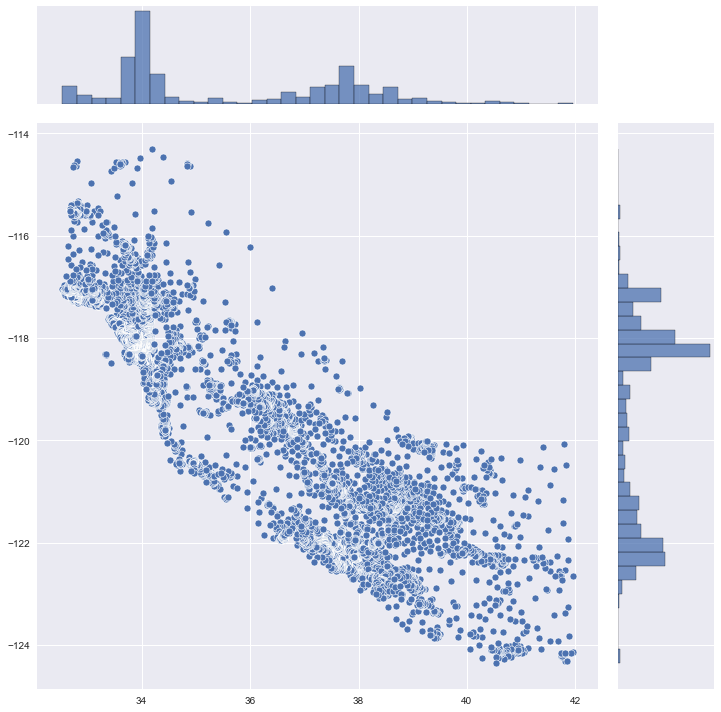

In [22]:

plt.figure(figsize = (10, 10))
sns.jointplot(x = housing.latitude.values, y = housing.longitude.values, height = 10)
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()
# sns.despine

## How Common Factors Are Affecting The Price Of Housing

### How number of rooms affects the pricings of houses

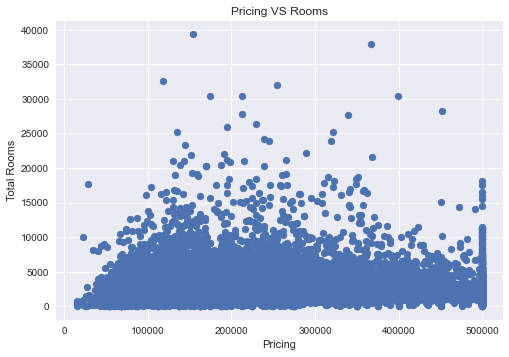

In [27]:
plt.scatter(housing.median_house_value, housing.total_rooms)
plt.xlabel("Pricing")
plt.ylabel("Total Rooms")
plt.title("Pricing VS Rooms")
plt.show()

### How house age affects the price of houses

Text(0, 0.5, 'Pricing')

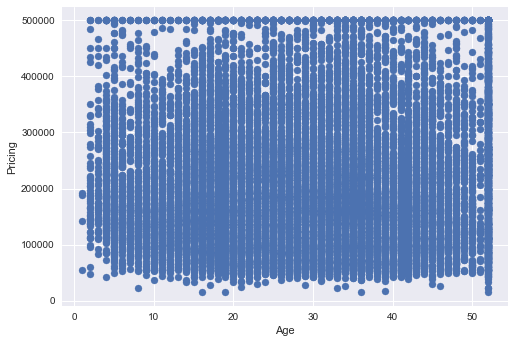

In [28]:
plt.scatter(housing.housing_median_age, housing.median_house_value)
plt.xlabel("Age")
plt.ylabel("Pricing")

### How house location affect house pricing

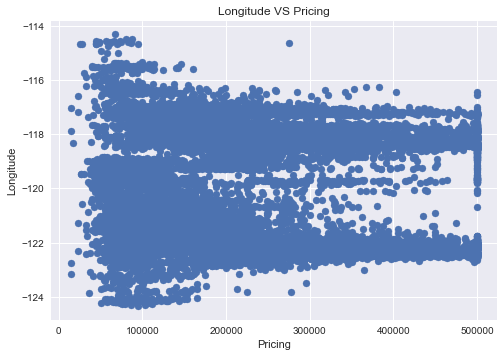

In [33]:
plt.scatter(housing.median_house_value, housing.longitude)
plt.xlabel("Pricing")
plt.ylabel("Longitude")
plt.title("Longitude VS Pricing")

plt.show()

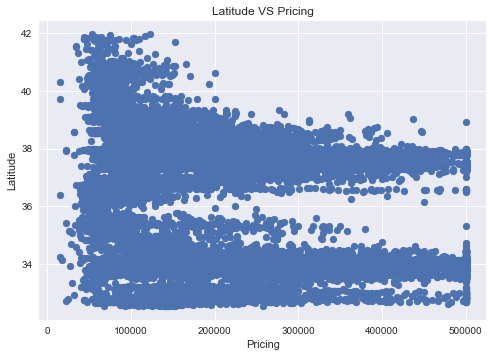

In [34]:
plt.scatter(housing.median_house_value, housing.latitude)
plt.xlabel("Pricing")
plt.ylabel("Latitude")
plt.title("Latitude VS Pricing")

plt.show()

### How House Population Affects House Pricing

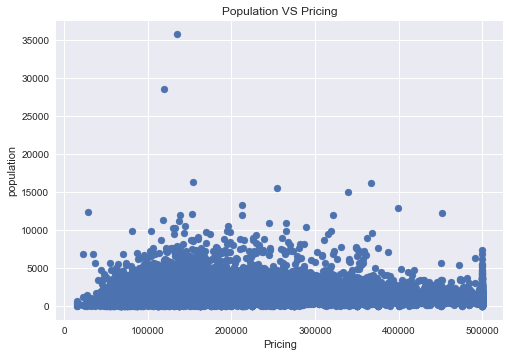

In [36]:
plt.scatter(housing.median_house_value, housing.population)
plt.xlabel("Pricing")
plt.ylabel("population")
plt.title("Population VS Pricing")

plt.show()